Q1. Mandelbrot Set

<ipython-input-3-686a62b54afe>:11: RuntimeWarning: invalid value encountered in square
  z = z**2 + c #update z values, z_n+1 = z_n**2 + c


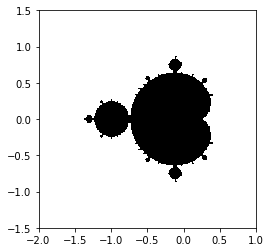

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 500
n_max = 50 #number of iterations
x,y = np.mgrid[-2:1:500j, -1.5:1.5:500j]
c = x + 1j * y #define c as a grid of x and y values from above
z = c #initialize z = c, because z_0 = 0
for i in range(n_max):
    z[abs(z) >= threshold] = np.inf #set all values of z greater than our threshold to infinity
    z = z**2 + c #update z values, z_n+1 = z_n**2 + c
    
mask = np.ma.masked_equal(abs(z), np.inf) #construct a mask, which masks values of z that equal infinity
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5]) #plot mandelbrot set
plt.gray()
plt.show()
plt.savefig('mandelbrot.png')

Q2. Markov Chain

Part 1

In [4]:
import numpy as np

num_states = 5
P = np.random.rand(num_states, num_states) #generate random 5x5 matrix P
P /= P.sum(axis=1)[:, np.newaxis] #normalize each row of matrix P 
print(P)

[[0.32623039 0.04890178 0.28979554 0.21359858 0.12147371]
 [0.14945933 0.30420453 0.06125495 0.2123204  0.27276079]
 [0.26546045 0.29014967 0.00467883 0.39252959 0.04718146]
 [0.08953446 0.2400194  0.13483442 0.14374287 0.39186886]
 [0.16727987 0.07961803 0.21267457 0.28171496 0.25871256]]


Part 2

In [5]:
p = np.random.rand(num_states) #generate random size-5 vector p
p /= p.sum() #normalize vector p
print(p)

for i in range(50): #iterate 50 times to apply transition rule 50 times
    p = P.T.dot(p) #multiply the transpose of P by p i.e., the transition rule
    
p_50 = p
print(p_50)

[0.20743105 0.25233385 0.25310799 0.25673601 0.0303911 ]
[0.19029378 0.18527386 0.14955234 0.23943331 0.23544671]


Part 3

In [8]:
w,v = np.linalg.eig(P.T) #find eigenvalues and corresponding eigenvectors of the transpose of P
stationary_w = np.argmin(abs(w - 1)) #find the eigenvalue closest to 1
p_stationary = v[:, stationary_w].real #find the eigenvector v corresponding to the eigenvalue closest to 1
p_stationary /= p_stationary.sum() #scale the eigenvector v so it becomes the stationary distribution i.e., normalized
print(p_stationary)

[0.19029378 0.18527386 0.14955234 0.23943331 0.23544671]


Part 4

In [9]:
if all(abs(p_stationary - p_50) < 1e-5): #check that their difference is within the given bound 1e-5
    print('p_stationary and p_50 match with each other within 1e-5.')

p_stationary and p_50 match with each other within 1e-5.
